# Deep Reinforcement Learning Coursework
### Alessandro Alviani - alessandro.alviani@city.ac.uk
### Dimitrios Megkos - dimitrios.megkos@city.ac.uk
### Part 1: Q-Learning
#### Grid world: Navigating the Frozen Lake

The environment is inspired by OpenAI Gym's FrozenLake.
The agent is placed in a 8x8 grid world, beginning always from the same state, trying to reach the other side
of the lake. The agent navigates through a frozen path, trying to avoid a number of holes the lake has. If the
agent falls into a hole, the agent starts again from the initial state. Because the path is frozen, the agent
will sometimes move to a different direction than the one that was picked. There are 64 available states
and four available actions (Up:0, Down:1, Left:2, Right:3).



#### Import libraries and custom functions

In [1]:
# Import numpy library
import numpy as np
# Import custom functions
from qlearning_functions import select_step, select_action, init_env, update_qvalue, plot_cma, reward_ma, timestep_ma, display_episodes, trainig_grid
import matplotlib.pyplot as plt
# Set random seed for reproducibility
np.random.seed(0)

#### Initialize the environment and parameters

In [2]:
# Initialize our environment
S, A, R, Q, state, goal_state, hole_state = init_env()

# Initialize Q-Learning parameters
alpha = 0.5 # Learning Rate
gamma = 0.99 # Discount parameter
num_ep = 10000 # Number of episodes
num_timestep = 500 # Number of timesteps

# Exploration rate
epsilon = 0.9 
max_epsilon = 0.9
min_epsilon = 0.01
epsilon_decay_rate = 0.00001

#### Initialize lists for evaluation metrics

In [3]:
# Initialize lists for evaluation metrics
reward_ep_list = [] # List containing rewards 
ts_ep_list = [] # List containing number or timesteps per episode
actions = [] # List containing the agent's actions
eps_decay = [] # List containing the updated epsilon per episode
goals = [] # List containing the number of goals hit by the agent
goal = 0

#### Train the agent

In [4]:
#run num_episodes episodes
for episode in range(num_ep):

    #print("Starting state is '{}'".format(S[state]))
    
    # Initialize/Reset reward metric
    r_metric = 0
   
    goals.append(goal)

    for timestep in range(num_timestep):
        # Select action
        action = select_action(R,Q,S,A,state,epsilon)

        # Get immediate reward
        r = R[state,action]
        #print("Reward for taking action '{}' from state '{}': {}".format(A[action], S[state], r))

        # Sum the reward
        r_metric += r

        # Update the state - move agent
        old_state = state # Store old state
            
        state = select_step(state,action) # Get new state
        #print("After taking action '{}' from state '{}', new state is '{}'".format(A[action], S[old_state], S[state]))

        # Update Q-Matrix
        Q = update_qvalue(alpha,gamma,Q,state,old_state,r,action)

        # print('Q matrix updated: \n\n {}'.format(Q))
        if episode % 250 == 0:
            actions.append(action)

        if S[state] == goal_state:
            # print("Goal state '{}' reached at episode '{}'. Ending episode.".format(goal_state, episode))
            actions.append(6)  # appends the number 6 if the agent reaches the goal
            goal += 1
            goals[-1] = goal
            break
        elif S[state] in hole_state:
            # print("Fell into a hole :( Ending episode.")
            actions.append(5)  # appends the number 5 if the agent falls into a hole
            break

    # Store metrics to lists
    ts_ep_list.append(timestep) # Number of timesteps
    reward_ep_list.append(r_metric) # Total episode rewards

    # Exploration rate decay 
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
    eps_decay.append(epsilon) # appends the updated epsilon to a list (used to plot this metric)

    state = S[0] # Start again from the beginning
    # print('Episode {} finished. Q matrix values:\n{}'.format(episode,Q.round(1)))

In [ ]:
# displays the agent movements (requires pygame: pip install pygame)
# the character's runs are displayed for every 250 epochs. Initially the character explores the environment \
# after about 1 minute and 30 seconds the character starts hitting the goal, and it will do the same in most sequent runs. 
# The whole training is displayed in about 2 minutes and 15 seconds. 
display_episodes(actions)

#### Print the Q Matrix

In [ ]:
# prints the final Q matrix
print('Final Q matrix: \n{}'.format(Q.round(2)))

#### Plots

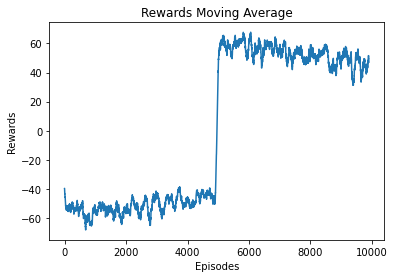

In [6]:
# plots the 100-episode reward average 
reward_ma(reward_ep_list, 100, True)

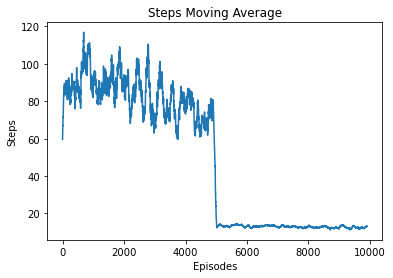

In [7]:
# plot the number of steps by number of episodes
timestep_ma(ts_ep_list, 100, True)

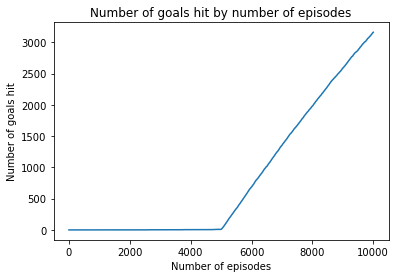

In [8]:
# plot the number of goals hit by number of episodes
plt.plot(np.arange(num_ep), goals)
plt.title('Number of goals hit by number of episodes')
plt.ylabel('Number of goals hit')
plt.xlabel('Number of episodes');

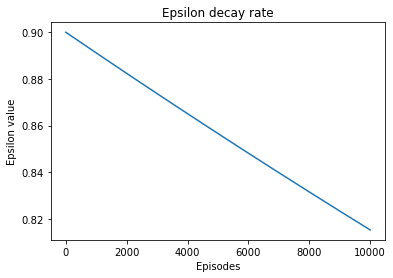

In [9]:
# plots the epsilon-greedy policy decay rate
plt.plot(np.arange(num_ep), eps_decay)
plt.ylabel('Epsilon value')
plt.xlabel('Episodes')
plt.title('Epsilon decay rate');

#### Grid Search

In [5]:
# sets hyperparameters for the grid search
alpha_grid = [0.9, 0.5, 0.1]
gamma_grid = [0.9, 0.5, 0.1]
eps_decay_rate_grid = [0.00001, 0.0001, 0.001]

# stars the grid search
for a in alpha_grid:
    for g in gamma_grid:
        for d in eps_decay_rate_grid:
            trainig_grid(a, g, d)  # function imported from qlearning_functions

Goals hit: 3102 | Cumulative reward:   -2605.0 | AVG steps: 49 | Alpha: 0.9 | Gamma: 0.9 | Epsilon_s: 0.9 | Epsilon_f: 0.82 | Decay Rate: 1e-05
Goals hit:  354 | Cumulative reward: -184988.0 | AVG steps: 25 | Alpha: 0.9 | Gamma: 0.9 | Epsilon_s: 0.9 | Epsilon_f: 0.34 | Decay Rate: 0.0001
Goals hit:    1 | Cumulative reward: -155974.5 | AVG steps: 11 | Alpha: 0.9 | Gamma: 0.9 | Epsilon_s: 0.9 | Epsilon_f: 0.01 | Decay Rate: 0.001
Goals hit:  268 | Cumulative reward: -417933.5 | AVG steps: 69 | Alpha: 0.9 | Gamma: 0.5 | Epsilon_s: 0.9 | Epsilon_f: 0.82 | Decay Rate: 1e-05
Goals hit:   50 | Cumulative reward: -236737.5 | AVG steps: 28 | Alpha: 0.9 | Gamma: 0.5 | Epsilon_s: 0.9 | Epsilon_f: 0.34 | Decay Rate: 0.0001
Goals hit:    0 | Cumulative reward: -154896.5 | AVG steps: 11 | Alpha: 0.9 | Gamma: 0.5 | Epsilon_s: 0.9 | Epsilon_f: 0.01 | Decay Rate: 0.001
Goals hit:   24 | Cumulative reward: -456919.0 | AVG steps: 72 | Alpha: 0.9 | Gamma: 0.1 | Epsilon_s: 0.9 | Epsilon_f: 0.82 | Decay Ra

#### Testing the hyperparameters 

In [141]:
goals_print = [] # List containing goals to print
steps_print = [] # List containing steps to print
reward_print = [] # List containing rewards to print
gamma = 0.9
alpha = 0.9
epsilon = 0.9
d = 0.00001

num_ep = 10000  
num_timestep = 500
for num_timestep in np.arange(100, 1000, 100):  

    # Initialize our environment
    S, A, R, Q, state, goal_state, hole_state = init_env() 
    
    goal = 0 
    r_metric = 0
    
    for episode in range(num_ep):
        
        # Initialize/Reset reward metric
        
        goals.append(goal)

        for timestep in range(num_timestep):
            # Select action
            action = select_action(R,Q,S,A,state,epsilon)
            # Get immediate reward
            r = R[state,action]
            # Sum the reward
            r_metric += r
            # Update the state - move agent
            old_state = state # Store old state  
            state = select_step(state,action) # Get new state
            # Update Q-Matrix
            Q = update_qvalue(alpha,gamma,Q,state,old_state,r,action)

            if S[state] == goal_state:
                goal += 1
                break
            elif S[state] in hole_state:
                break

        # Store metrics to lists
        ts_ep_list.append(timestep) # Number of timesteps
        reward_ep_list.append(r_metric) # Total episode rewards

        # Exploration rate decay 
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-d*episode)
        eps_decay.append(epsilon) # appends the updated epsilon to a list (used to plot this metric)

        state = S[0] # Start again from the beginning

    
    goals_print.append(goal)
    s = sum(reward_ep_list)
    reward_print.append(r_metric)
    t = sum(ts_ep_list)/num_ep
    steps_print.append(t)

#### Plotting the model performance at different hyperparameters values

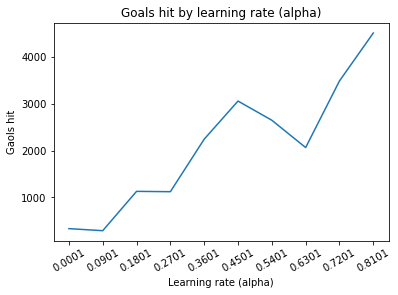

In [120]:
# goals by learning rate
plt.plot(np.arange(0.0001, 0.9, 0.09), goals_print)
plt.title('Goals hit by learning rate (alpha)')
plt.ylabel('Gaols hit')
plt.xticks(np.arange(0.0001, 0.9, 0.09), rotation = 30)
plt.xlabel('Learning rate (alpha)');

Text(0.5, 0, 'Learning rate (alpha')

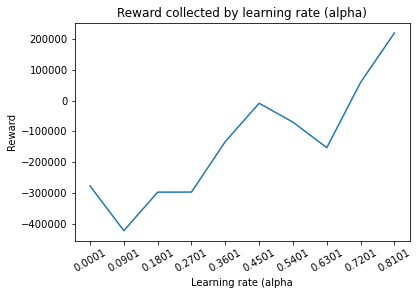

In [121]:
# rewards by learning rate
plt.plot(np.arange(0.0001, 0.9, 0.09), reward_print)
plt.title('Reward collected by learning rate (alpha)')
plt.ylabel('Reward')
plt.xticks(np.arange(0.0001, 0.9, 0.09), rotation = 30)
plt.xlabel('Learning rate (alpha')

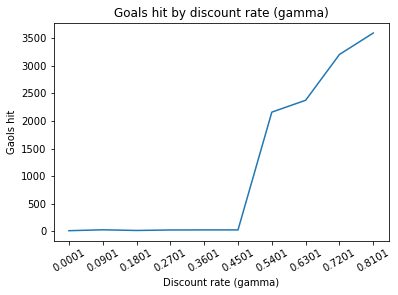

In [111]:
# goals by gamma
plt.plot(np.arange(0.0001, 0.9, 0.09), goals_print)
plt.title('Goals hit by discount rate (gamma)')
plt.ylabel('Gaols hit')
plt.xticks(np.arange(0.0001, 0.9, 0.09), rotation = 30)
plt.xlabel('Discount rate (gamma)');

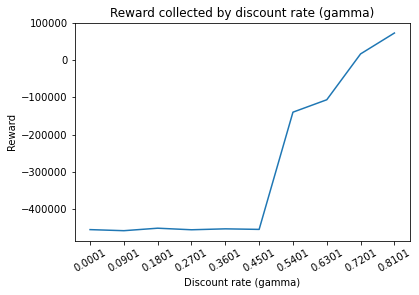

In [113]:
# rewards by gamma
plt.plot(np.arange(0.0001, 0.9, 0.09), reward_print)
plt.title('Reward collected by discount rate (gamma)')
plt.ylabel('Reward')
plt.xticks(np.arange(0.0001, 0.9, 0.09), rotation = 30)
plt.xlabel('Discount rate (gamma)');

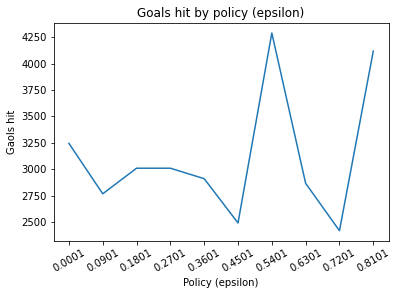

In [123]:
# goals by epsilon
plt.plot(np.arange(0.0001, 0.9, 0.09), goals_print)
plt.title('Goals hit by policy (epsilon)')
plt.ylabel('Gaols hit')
plt.xticks(np.arange(0.0001, 0.9, 0.09), rotation = 30)
plt.xlabel('Policy (epsilon)');

Text(0.5, 0, 'Policy (epsilon)')

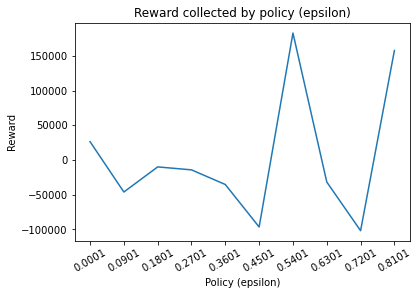

In [124]:
# rewards by epsilon
plt.plot(np.arange(0.0001, 0.9, 0.09), reward_print)
plt.title('Reward collected by policy (epsilon)')
plt.ylabel('Reward')
plt.xticks(np.arange(0.0001, 0.9, 0.09), rotation = 30)
plt.xlabel('Policy (epsilon)')

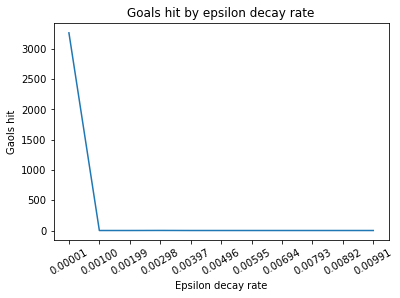

In [139]:
# goals by decay rate
plt.plot(np.arange(0.00001, 0.01, 0.00099), goals_print)
plt.title('Goals hit by epsilon decay rate')
plt.ylabel('Gaols hit')
plt.xticks(np.arange(0.00001, 0.01, 0.00099), rotation = 30)
plt.xlabel('Epsilon decay rate');

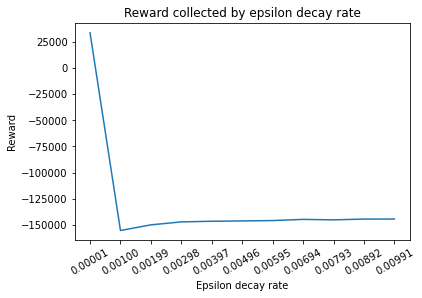

In [140]:
# rewards by decay rate
plt.plot(np.arange(0.00001, 0.01, 0.00099), reward_print)
plt.title('Reward collected by epsilon decay rate')
plt.ylabel('Reward')
plt.xticks(np.arange(0.00001, 0.01, 0.00099), rotation = 30)
plt.xlabel('Epsilon decay rate');

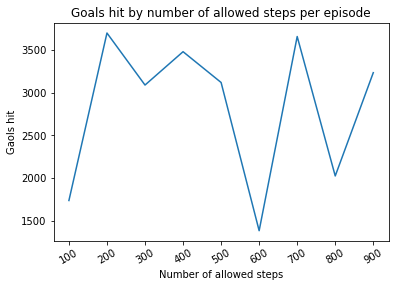

In [142]:
# goals by timesteps
plt.plot(np.arange(100, 1000, 100), goals_print)
plt.title('Goals hit by number of allowed steps per episode')
plt.ylabel('Gaols hit')
plt.xticks(np.arange(100, 1000, 100), rotation = 30)
plt.xlabel('Number of allowed steps');

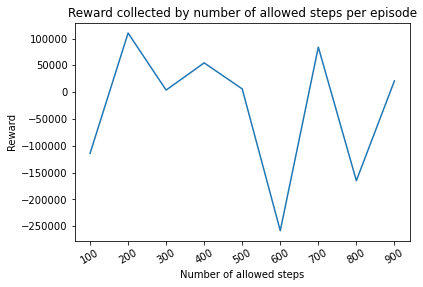

In [143]:
# rewards by timesteps
plt.plot(np.arange(100, 1000, 100), reward_print)
plt.title('Reward collected by number of allowed steps per episode')
plt.ylabel('Reward')
plt.xticks(np.arange(100, 1000, 100), rotation = 30)
plt.xlabel('Number of allowed steps');